In [1]:
import torchvision
from torch import nn
import pathlib
import matplotlib.pyplot as plt
import utils
from torch import nn
from dataloaders4 import load_cifar10
from trainer4 import Trainer, compute_loss_and_accuracy

In [2]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10) # No need to apply softmax,
        # as this is done in nn.CrossEntropyLoss
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers
        
    def forward(self, x):
        x = self.model(x)
        return x

In [3]:
def create_plots(trainer: Trainer, name: str):
    plot_path = pathlib.Path("plots")
    plot_path.mkdir(exist_ok=True)
    # Save plots and show them
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.title("Cross Entropy Loss")
    utils.plot_loss(trainer.train_history["loss"], label="Training loss", npoints_to_average=10)
    utils.plot_loss(trainer.validation_history["loss"], label="Validation loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    utils.plot_loss(trainer.validation_history["accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.savefig(plot_path.joinpath(f"{name}_plot.png"))
    plt.show()


Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

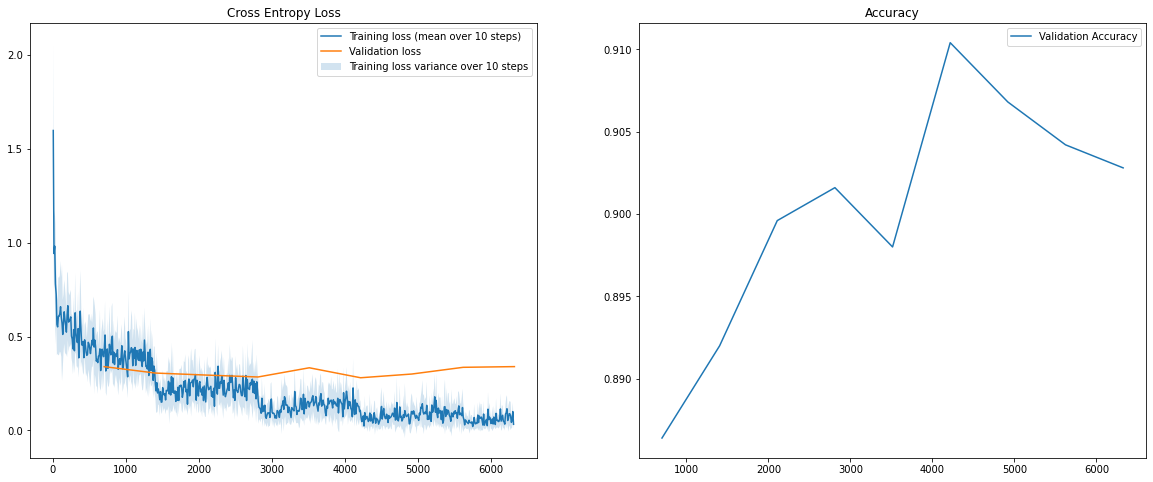

(tensor(0.0540, device='cuda:0'), tensor(0.9824, device='cuda:0'))
(tensor(0.3890, device='cuda:0'), tensor(0.8914, device='cuda:0'))
(tensor(0.4271, device='cuda:0'), tensor(0.8923, device='cuda:0'))


In [5]:
if __name__ == "__main__":
    # Set the random generator seed (parameters, shuffling etc).
    # You can try to change this and check if you still get the same result! 
    utils.set_seed(0)
    epochs = 10
    batch_size = 32
    learning_rate = 5e-4
    early_stop_count = 4
    weight_decay = 0
    dataloaders = load_cifar10(batch_size)
    model = Model()
    trainer = Trainer(
        batch_size,
        learning_rate,
        early_stop_count,
        epochs,
        model,
        dataloaders,
        weight_decay
    )
    trainer.train()
    create_plots(trainer, "task4a")
    
    dataloader_train, dataloader_val, dataloader_test = dataloaders
    print(compute_loss_and_accuracy(dataloader_train, model, nn.CrossEntropyLoss()))
    print(compute_loss_and_accuracy(dataloader_val, model, nn.CrossEntropyLoss()))
    print(compute_loss_and_accuracy(dataloader_test, model, nn.CrossEntropyLoss()))